In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame

In [2]:
pd.options.display.max_rows = 10

Create a HDF Store for serializing the data

In [3]:
store = pd.HDFStore('store.h5')

In [5]:
print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: store.h5
/ADAC                                     frame_table  (typ->appendable,nrows->2874,ncols->7,indexers->[index],dc->[])    
/ADAC/meta/values_block_0/meta            series_table (typ->appendable,nrows->44,ncols->1,indexers->[index],dc->[values])
/ADAC/meta/values_block_1/meta            series_table (typ->appendable,nrows->6,ncols->1,indexers->[index],dc->[values]) 
/ADAC/meta/values_block_2/meta            series_table (typ->appendable,nrows->7,ncols->1,indexers->[index],dc->[values]) 
/AIR/FLUGFELD/NO                          frame_table  (typ->appendable,nrows->127817,ncols->1,indexers->[index],dc->[])  
/AIR/FLUGFELD/NO2                         frame_table  (typ->appendable,nrows->127779,ncols->1,indexers->[index],dc->[])  
/AIR/FLUGFELD/O3                          frame_table  (typ->appendable,nrows->129541,ncols->1,indexers->[index],dc->[])  
/AIR/FLUGFELD/PM10                        frame_table  (typ->appendable,nrows->13

# ADAC - df0 mit Abgasnorm Euro 6d-Temp, Euro 6d

[ADAC - df0 mit Abgasnorm Euro 6d-Temp, Euro 6d](https://www.adac.de/rund-ums-fahrzeug/auto-kaufen-verkaufen/neuwagenkauf/euro-6d-temp-modelle)

In [4]:
store.get('/ADAC')

,Hersteller,Modell,Motorart,Hubraum,Leistung,Abgasnorm,Markteinfuehrung
0,Abarth,595,Otto,1368,107,Euro 6d-TEMP-EVAP,2018-09-01
1,Abarth,595 Pista,Otto,1368,118,Euro 6d-TEMP-EVAP,2018-09-01
2,Abarth,595 Turismo,Otto,1368,121,Euro 6d-TEMP-EVAP,2018-09-01
3,Abarth,595 Competizione,Otto,1368,132,Euro 6d-TEMP-EVAP,2018-09-01
4,Abarth,595C,Otto,1368,107,Euro 6d-TEMP-EVAP,2018-09-01
...,...,...,...,...,...,...,...
2869,VW,Touran 2.0 TDI SCR,Diesel,1968,140,Euro 6d-TEMP,2019-01-01
2870,VW,up! 1.0,Otto,999,44,Euro 6d-TEMP,2018-08-01
2871,VW,up! 1.0,Otto,999,55,Euro 6d-TEMP,2018-08-01
2872,VW,up! 1.0 TSI,Otto,999,66,Euro 6d-TEMP,2018-09-01


# Umweltdaten Nürnberg

[Messstation Jakobsplatz - Stadt Nürnberg](http://umweltdaten.nuernberg.de/aussenluft/stadt-nuernberg/messstation-jakobsplatz.html)

In [16]:
no2 = store.get('/AIR/JAKOBSPALTZ/NO2')

In [17]:
no2.head()

,Wert (µg/m³)
Datum/Zeit,
2005-05-24 21:00:00,21.0
2005-01-06 00:00:00,46.0
2005-01-06 01:00:00,45.0
2005-01-06 02:00:00,40.0
2005-01-06 03:00:00,52.0


> "*Although fine particle OC concentrations did not correlate with day of the week, EC concentrations showed a significant weekly pattern, with the highest concentration during the middle of the workweek and the lowest concentration on Sundays.*"
https://www.ncbi.nlm.nih.gov/pubmed/15303295

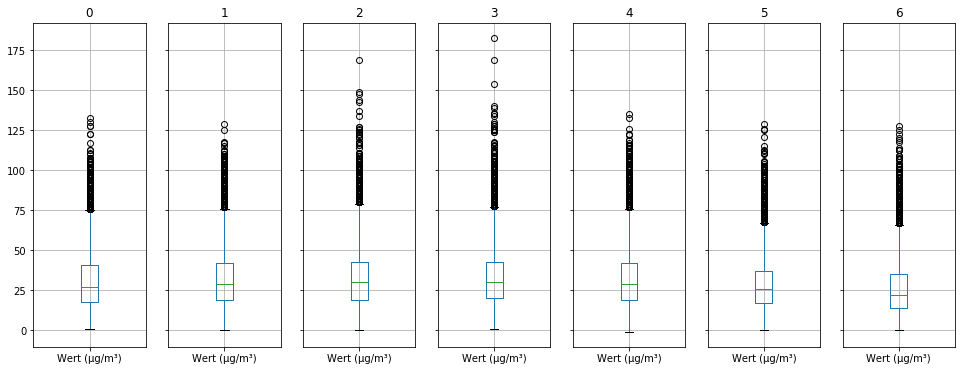

In [18]:
no2.groupby(no2.index.weekday).boxplot(layout=(1,7), figsize=(16, 6));

In [173]:
gp = df1.groupby(df1.index.weekday)

In [182]:
%timeit df1[df1.index.weekday == 2]

7.61 ms ± 75.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [183]:
%timeit df1.groupby(df1.index.weekday).get_group(2)

10.2 ms ± 73.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
df_wend = no2[no2.index.weekday == 2]

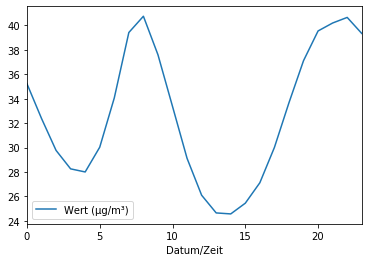

In [20]:
df_wend.groupby(df_wend.index.hour).mean().plot()

In [21]:
import seaborn as sns

In [22]:
df_wend_h = df_wend.groupby(df_wend.index.hour)

In [23]:
df_wend_h.describe()

Wert (µg/m³)                                                     
                  count       mean        std  min   25%   50%    75%    max
Datum/Zeit                                                                  
0                 734.0  35.231608  18.879695  0.0  21.0  31.0  45.00  117.0
1                 732.0  32.387978  17.963248  0.0  19.0  28.0  43.00  105.0
2                 732.0  29.771858  16.697719  0.0  17.0  26.0  39.00   94.0
3                 733.0  28.260573  15.287465  0.0  16.0  26.0  37.00   92.0
4                 734.0  28.006812  14.522738  1.0  17.0  25.0  37.00   86.0
...                 ...        ...        ...  ...   ...   ...    ...    ...
19                734.0  37.117166  19.447552  6.0  22.0  34.0  47.75  169.0
20                735.0  39.551020  19.969317  6.0  25.0  37.0  49.00  149.0
21                733.0  40.200546  20.146035  4.0  25.0  36.0  50.00  143.0
22                732.0  40.658470  20.427531  6.0  26.0  37.0  51.00  137.0
23                731.0  39.346101  20.046775  5.0  24.0  36.0  50.00  127.0

[24 rows x 8 columns]

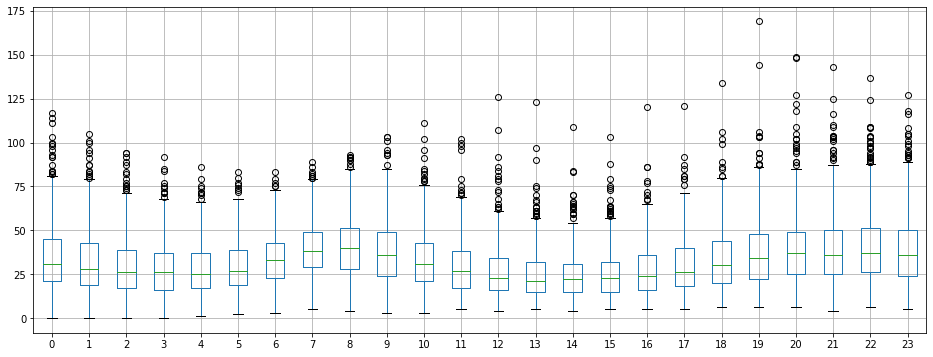

In [25]:
df_wend_h.boxplot(subplots=False, figsize=(16, 6), column=list(df_wend_h.groups.keys()))

In [26]:
cut = pd.qcut(no2.iloc[:, 0].to_numpy(), q=10)

In [27]:
df1.groupby(cut).mean()

,Wert (µg/m³)
"(-1.001, 12.0]",9.388548
"(12.0, 16.0]",14.562333
"(16.0, 20.0]",18.502916
"(20.0, 24.0]",22.476784
"(24.0, 28.0]",26.482959
"(28.0, 32.0]",30.469289
"(32.0, 37.0]",34.937609
"(37.0, 44.0]",40.806170
"(44.0, 54.0]",49.076030
"(54.0, 183.0]",67.520973


In [140]:
week_df

,Wert (µg/m³)
Datum/Zeit,
0,30.795003
1,31.919744
2,32.267578
3,32.525385
4,31.770725
5,28.693349
6,25.967082


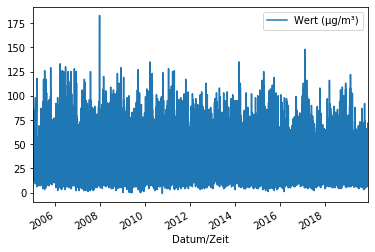

In [28]:
df1.plot()

In [ ]:
http://umweltdaten.nuernberg.de/csv/aussenluft/stadt-nuernberg/archiv/csv-export/SUN/nuernberg-jakobsplatz/stickstoffmonoxid/individuell/01.06.2005/27.11.2019/export.csv
http://umweltdaten.nuernberg.de/csv/aussenluft/stadt-nuernberg/archiv/csv-export/SUN/nuernberg-jakobsplatz/lufttemperatur-aussen/individuell/01.06.2005/27.11.2019/export.csv
http://umweltdaten.nuernberg.de/csv/aussenluft/stadt-nuernberg/archiv/csv-export/SUN/nuernberg-jakobsplatz/stickstoffdioxid/individuell/01.06.2005/27.11.2019/export.csv    
http://umweltdaten.nuernberg.de/csv/aussenluft/stadt-nuernberg/archiv/csv-export/SUN/nuernberg-jakobsplatz/staub-pm-25/individuell/01.06.2005/27.11.2019/export.csv    
http://umweltdaten.nuernberg.de/csv/aussenluft/stadt-nuernberg/archiv/csv-export/SUN/nuernberg-jakobsplatz/staubpartikel-pm10/individuell/01.06.2005/27.11.2019/export.csv    

In [ ]:
http://umweltdaten.nuernberg.de/csv/aussenluft/stadt-nuernberg/archiv/csv-export/SUN/nuernberg-jakobsplatz/staubpartikel-pm10/individuell/01.06.2005/27.11.2019/export.csv    

In [17]:
urls = {
    'stickstoffmonoxid': "http://umweltdaten.nuernberg.de/csv/aussenluft/stadt-nuernberg/messstation-jakobsplatz/stickstoffmonoxid/csv-export/SUN/nuernberg-jakobsplatz/stickstoffmonoxid/7-Tages-Ansicht/export.csv",
    'stickstoffdioxid': "http://umweltdaten.nuernberg.de/csv/aussenluft/stadt-nuernberg/messstation-jakobsplatz/stickstoffdioxid/csv-export/SUN/nuernberg-jakobsplatz/stickstoffdioxid/7-Tages-Ansicht/export.csv",
    'ozon': "http://umweltdaten.nuernberg.de/csv/aussenluft/stadt-nuernberg/messstation-jakobsplatz/ozon/csv-export/SUN/nuernberg-jakobsplatz/ozon/7-Tages-Ansicht/export.csv",
    'pm10': "http://umweltdaten.nuernberg.de/csv/aussenluft/stadt-nuernberg/messstation-jakobsplatz/feinstaub-pm10/csv-export/SUN/nuernberg-jakobsplatz/staubpartikel-pm10/7-Tages-Ansicht/export.csv",
    'pm25': "http://umweltdaten.nuernberg.de/csv/aussenluft/stadt-nuernberg/messstation-jakobsplatz/feinstaub-pm25/csv-export/SUN/nuernberg-jakobsplatz/staub-pm-25/7-Tages-Ansicht/export.csv"
}

In [28]:
opts = {
    'skiprows': range(10),
    'encoding': 'ISO-8859-1',
    'sep': ";", 'index_col':0
}

res = {comp: pd.read_csv(url, **opts) for comp, url in urls.items()}

In [ ]:
http://umweltdaten.nuernberg.de/csv/aussenluft/stadt-nuernberg/archiv/csv-export/SUN/nuernberg-jakobsplatz/stickstoffdioxid/individuell/01.06.2005/27.11.2019/export.csv    

In [29]:
[df.shape for df in res.values()]

[(187, 1), (187, 1), (187, 1), (187, 1), (187, 1)]

In [30]:
res['ozon']

,Wert (µg/m³)
Datum/Zeit,
20.11.2019 01:00,23
20.11.2019 02:00,31
20.11.2019 03:00,32
20.11.2019 04:00,25
20.11.2019 05:00,27
...,...
27.11.2019 15:00,12
27.11.2019 16:00,8
27.11.2019 17:00,6


In [18]:
import stumpy

In [37]:
val = dfk.dropna().to_numpy().ravel()

In [39]:
st = stumpy.stump(val, val.size // 330)

In [32]:
import matplotlib.pyplot as plt

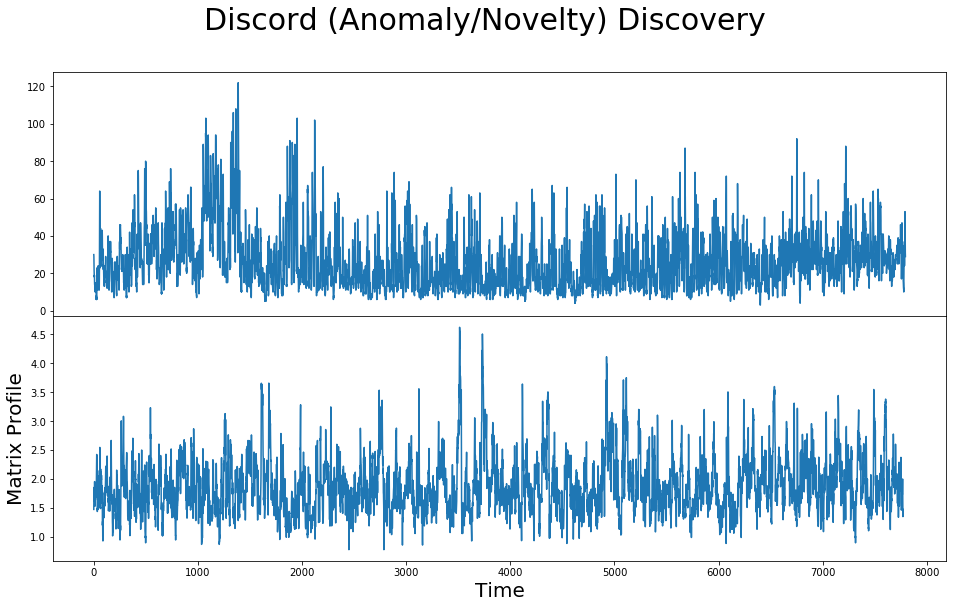

In [40]:
fig, axs = plt.subplots(2, sharex=True, 
                        figsize=(16,9),
                        gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

axs[0].plot(val)

axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
#axs[1].axvline(x=3864, linestyle="dashed")
axs[1].plot(st[:, 0])